In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [2]:
# Read test and train data
test_df = pd.read_csv("fashionmnist/fashion-mnist_test.csv")
train_df = pd.read_csv("fashionmnist/fashion-mnist_train.csv")

# Display information about train data
train_df.info()

# Display table view of train data
train_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# extract labels array from train/test data
train_labels = np.asarray(train_df["label"])
test_labels = np.asarray(test_df["label"])

# remove labels column from train/test data
train_df = train_df.drop(['label'], axis=1)
test_df = test_df.drop(['label'], axis=1)

# now the data is split into 2 sets: images and labels

In [4]:
# verify that label and train data are separated
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# the current format of each image is a list of 748 pixels; however, this needs to be converted into a 2d array of 28 x 28
train_df.shape

(60000, 784)

In [6]:
# verify that the number of labels matches the length of the train data
len(train_labels)

60000

In [7]:
# each image in train_df and test_df is currently in the form of a row of 784 pixel values
# we know that each image is 28 x 28 so we need to convert each row to a 2d numpy array of length 28 x 28
# this needs to be done for both the train_images set and the test_images set

train_images = []
test_images = []

# iterate through each row in train_images
for row in train_df.itertuples():
    temp_row = []
    temp_image = []
    
    # iterate through each value in row and divide it into a 28 x 28 array
    for i in range(1, len(row)):
        temp_row.append(row[i])
        
        if (i % 28 == 0):
            temp_image.append(np.asarray(temp_row))
            temp_row = []
    # append the 28 x 28 image array to the train_images
    train_images.append(np.asarray(temp_image))
    
train_images = np.asarray(train_images)

# verify that each train_images element is in the correct format
print(train_images[0])

# the above process is repeated, but with test_images instead
for row in test_df.itertuples():
    temp_row = []
    temp_image = []
    for i in range(1, len(row)):
        temp_row.append(row[i])
        if (i % 28 == 0):
            temp_image.append(np.asarray(temp_row))
            temp_row = []
    test_images.append(np.asarray(temp_image))
    
test_images = np.asarray(test_images)

# verify that each test_images element is in the correct format
print(test_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0   0  62  61  21  29  23  51 136  61
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  88 201 228 225 255 115  62 137 255 235 222
  255 135   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  47 252 234 238 224 215 215 229 108 180 207 214 224
  231 249 254  45   0   0   0   0   0   0]
 [  0   0   1   0   0 214 222 210 213 224 225 217 220 254 233 219 221 217
  223 221 240 254   0   0   1   0   0   0]
 [  1   0   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219
  213 226 211 237 150   0   0   0   0   0]
 [  0   2   0   0 237 222 215 207 210 212 213 206 214 213 214 21

In [8]:
# list of estimate categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

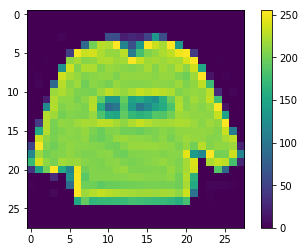

In [9]:
# sample image from train_images array
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# scale data to the range of 0 to 1
train_images = train_images.astype('float32') / 255.0

test_images = test_images.astype('float32') / 255.0

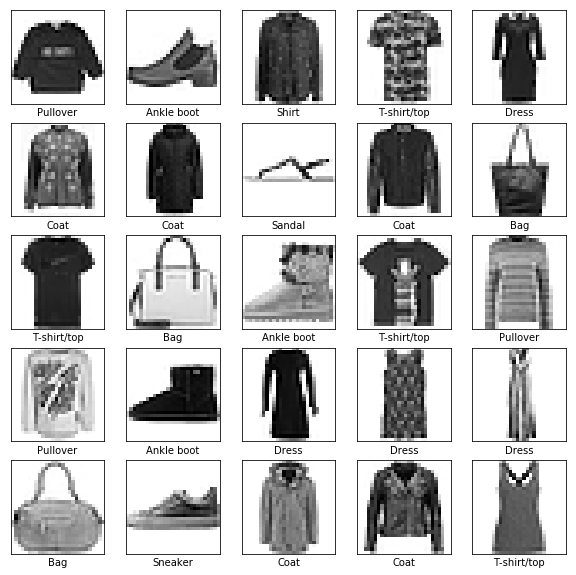

In [11]:
# displays multiple sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# view current train_images shape
print(train_images.shape)

(60000, 28, 28)


In [13]:
# the shape of the data needs to be of form (?, 28, 28, 1)
x_valid = train_images[:10000]
partial_x_train = train_images[10000:]

y_valid = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
partial_x_train = partial_x_train.reshape(partial_x_train.shape[0], img_rows, img_cols, 1)

# Prepare the test images
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

# Prepare the validation images
x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)

# verify change of shape
print(partial_x_train.shape)
print(partial_y_train.shape)
print(test_images.shape)

(50000, 28, 28, 1)
(50000,)
(10000, 28, 28, 1)


In [14]:
# build model
cnn3 = tf.keras.Sequential()
cnn3.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn3.add(tf.keras.layers.Dropout(0.25))

cnn3.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn3.add(tf.keras.layers.Dropout(0.25))

cnn3.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(tf.keras.layers.Dropout(0.4))

cnn3.add(tf.keras.layers.Flatten())

cnn3.add(tf.keras.layers.Dense(128, activation='relu'))
cnn3.add(tf.keras.layers.Dropout(0.3))
cnn3.add(tf.keras.layers.Dense(10, activation='softmax'))

cnn3.summary() 

cnn3.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [15]:
# train model with 15 epochs
numEpochs = 15
history = cnn3.fit(partial_x_train,
             partial_y_train,
             batch_size=64,
             epochs=numEpochs,
             validation_data=(x_valid, y_valid),
             verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 20s 409us/sample - loss: 0.6999 - acc: 0.7372 - val_loss: 0.4261 - val_acc: 0.8392
Epoch 2/15
50000/50000 [==============================] - 20s 397us/sample - loss: 0.4532 - acc: 0.8334 - val_loss: 0.3397 - val_acc: 0.8748
Epoch 3/15
50000/50000 [==============================] - 20s 406us/sample - loss: 0.3928 - acc: 0.8565 - val_loss: 0.3105 - val_acc: 0.8852
Epoch 4/15
50000/50000 [==============================] - 20s 403us/sample - loss: 0.3621 - acc: 0.8682 - val_loss: 0.3022 - val_acc: 0.8846
Epoch 5/15
50000/50000 [==============================] - 20s 409us/sample - loss: 0.3353 - acc: 0.8777 - val_loss: 0.2870 - val_acc: 0.8973
Epoch 6/15
50000/50000 [==============================] - 21s 411us/sample - loss: 0.3219 - acc: 0.8816 - val_loss: 0.2789 - val_acc: 0.8967
Epoch 7/15
50000/50000 [==============================] - 21s 413us/sample - loss: 0.3047 - acc: 0.8883 

In [16]:
# Evaluate the model on test set
score = cnn3.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('Test accuracy:', score[1])

# save model
cnn3.save('cnn3.model')

Test accuracy: 0.9157


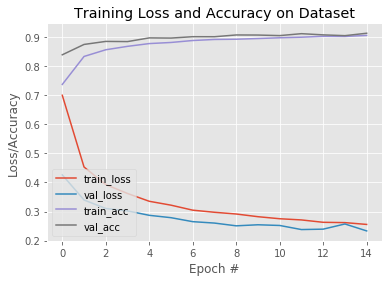

In [17]:
from sklearn.metrics import classification_report

# make predictions on the test set
preds = cnn3.predict(test_images)
  
# plot the training loss and accuracy
N = numEpochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [18]:
# this section is used to display some prediction results in a visual format

import cv2
from imutils import build_montages

# reload model
cnn3 = tf.keras.models.load_model('cnn3.model')

# initialize our list of output images
images = []
 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(test_labels)), size=(16,)):
    # classify the clothing
    probs = cnn3.predict(test_images[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = class_names[prediction[0]]
    
    print("prediction: ", prediction, label)
    print("actual: ", test_labels[i], class_names[test_labels[i]])
    
    # extract the image from the testData if using "channels_first"
    # ordering
    if tf.keras.backend.image_data_format() == "channels_first":
        image = (test_images[i][0] * 255).astype("uint8")
 
    # otherwise we are using "channels_last" ordering
    else:
        image = (test_images[i] * 255).astype("uint8")
# initialize the text label color as green (correct)
    color = (0, 255, 0)
 
    # otherwise, the class label prediction is incorrect
    if prediction[0] != test_labels[i]:
        color = (0, 0, 255)
 
    # merge the channels into one image and resize the image from
    # 28x28 to 96x96 so we can better see it and then draw the
    # predicted label on the image
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
        color, 2)
 
    # add the image to our list of output images
    images.append(image)
    print(" ")

# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]
 
# show the output montage
cv2.imshow("Fashion MNIST", montage)
cv2.waitKey(0)

prediction:  [2] Pullover
actual:  2 Pullover
 
prediction:  [6] Shirt
actual:  0 T-shirt/top
 
prediction:  [3] Dress
actual:  3 Dress
 
prediction:  [8] Bag
actual:  8 Bag
 
prediction:  [1] Trouser
actual:  1 Trouser
 
prediction:  [8] Bag
actual:  8 Bag
 
prediction:  [1] Trouser
actual:  1 Trouser
 
prediction:  [8] Bag
actual:  8 Bag
 
prediction:  [3] Dress
actual:  3 Dress
 
prediction:  [4] Coat
actual:  4 Coat
 
prediction:  [3] Dress
actual:  3 Dress
 
prediction:  [0] T-shirt/top
actual:  6 Shirt
 
prediction:  [4] Coat
actual:  4 Coat
 
prediction:  [3] Dress
actual:  3 Dress
 
prediction:  [9] Ankle boot
actual:  9 Ankle boot
 
prediction:  [1] Trouser
actual:  1 Trouser
 


0